In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sys import path
path.append('../')

In [98]:
import seaborn as sb
import numpy as np
import pandas as pd

In [33]:
from utils.loading import load_data
from utils.protocol_creation import summarize_alliance
from utils.ai_summary import create_chatgpt_prompt

In [7]:
import scipy
from tqdm.auto import tqdm

In [107]:
data = load_data('../data')

/home/tobi/development/start_hack_2023/notebooks/../utils/loading.py:16: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  messages2 = pd.read_csv(path /'chat_messages_2_fixed.csv')


In [44]:
racist_alliance_id = '5bb44180ae3a20f38b38d07a3b987c3e55945f6c2d501338e53ff577221e8329'
bully_joiner_alliance_id = 'bc4c1c692638efa4a9ff139e82e87e9d79d247816350840197d3f0a7ef6d1ba7'

In [45]:
alliance_summary = summarize_alliance(data, racist_alliance_id)

User: 5f8f06982f01b39f5cf2 | 0.0$/0.0$ | 0.06h 20.36h | 19.0lvl | since 902 days | risk mean 1.0


/home/tobi/development/start_hack_2023/notebooks/../utils/protocol_creation.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alliance_messages['content'] = alliance_messages['raw_message']
/home/tobi/development/start_hack_2023/notebooks/../utils/protocol_creation.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alliance_messages['type'] = "Chat|" + alliance_messages['account_id'].str[:3]


In [46]:
alliance_summary

,content,type
42300,This clan so bad,Chat|5f8
3820,kicked_out,Action|5f8
65040,bitch,Chat|468
153376,******,Chat|981
153751,******,Chat|fd4
84197,bro,Chat|fd4
146217,**** *** ***** ******,Chat|4d3
18247,Y’all ****** *****,Chat|981
138269,*****,Chat|981
65276,lets watch animan,Chat|468


In [50]:
prompt = create_chatgpt_prompt(alliance_summary)
print(prompt)

First, summarize the following group chat from the mobile game clash royal:

User 5f8 says: This clan so bad
User 5f8 was kicked
User 468 says: bitch
User 981 says: ******
User fd4 says: ******
User fd4 says: bro
User 4d3 says: **** *** ***** ******
User 981 says: Y’all ****** *****
User 981 says: *****
User 468 says: lets watch animan
User 468 says: i love animan
User 468 says: i need a non jewish partner
User fd4 says: shut up ******
User fd4 says: ****** cheaters
User fd4 says: we still 2 towers left ******
User 468 says: challenger 3?

Second, take the role of a neutral moderator. List users using inappropriate language.


<Axes: xlabel='risk', ylabel='Count'>

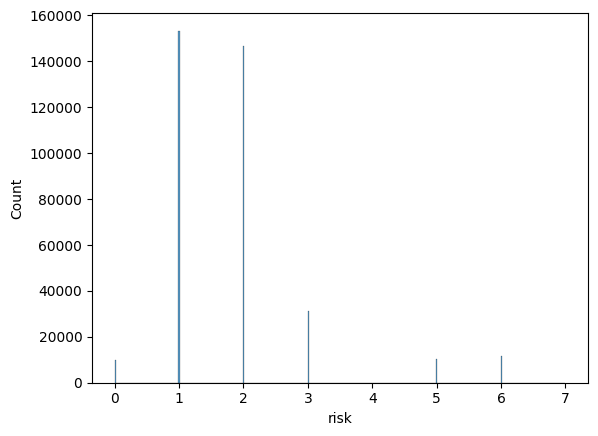

In [54]:
sb.histplot(data.messages.risk)

<Axes: xlabel='is_toxic', ylabel='Count'>

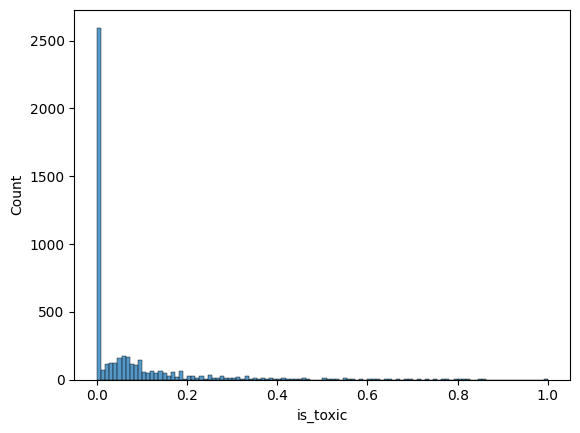

In [81]:
msg = data.messages.copy()
msg['is_toxic'] = msg.risk > 3
groups = msg.groupby('account_id')
mask = groups['is_toxic'].count()>10
res = groups['is_toxic'].mean()[mask]
sb.histplot(res)

In [127]:
alliance_msg_count = msg.groupby('alliance_id')['account_id'].count()
moderate_toxic = res[(res>0.1) & (res<0.3)]
msg['is_moderate_toxic'] = msg.account_id.isin(moderate_toxic.index)
moderate_toxic_score = msg.groupby('alliance_id')['is_moderate_toxic'].mean()
moderate_toxic_res = pd.DataFrame({'moderate_toxic_score':moderate_toxic_score, 'msg_count':alliance_msg_count})
moderate_toxic_res[moderate_toxic_res.msg_count>10].sort_values('moderate_toxic_score', ascending=False)

,moderate_toxic_score,msg_count
alliance_id,,
80328c28b8c2d119d352806e35b2317ebfc955f5903b95f362924ab2208c5886,1.0,43
33f46d19d27b63497cc230693af6cf66998950a6a6d291a25e559b5e97118027,1.0,65
3e50f449aae2dd7f671ab790e0334a37a0fe382cf90efbe24b504535258900d3,1.0,19
b94648d10e12ad7a8851fa73525611b49605c22ccc9846ca2f64bb59741300ca,1.0,12
fec69a368855fb31e40570bd5ef8f2ad89e2d731cb92a9054a8a5c9fbf3eee6c,1.0,28
...,...,...
5af0f0e92114d746fb7a2d347989566a9a76cfc4490dc2d928ef72b552b31802,0.0,11
5aedb8f135d26c52a40e006f77fba0d4aa1584e39b2253f71be089d0457e481f,0.0,13
5ae49555181d08a32534c971c0e46528673fbe353b79d5292fa7aed17f7aadf4,0.0,34


In [128]:
moderate_toxic_groups.sort_values(ascending=False)

alliance_id
250247266c72a0d7c21ca3749ebef8494e97c394e1ffb2c8e97d5305c4ccd46f    1.0
245bd29baff8b23095e153baab56c8a0aefad2f2b8e20c910984f398daec970c    1.0
fb68058ddd2dc42919bbba3ab445125fb24b10c9faa2030ae789f9397d5411c1    1.0
269f7124a19a7e76652e6382f2cb997e5286cb30cda2991f800b9ca92e1903a1    1.0
7739f97a707dd502cb7a256714bf84b4e3fd5e1cba8b6cac71bae55553f7a0c4    1.0
                                                                   ... 
5678696de59b4c41044ed439786d2ec41c4d0c06fd78b88750ebf48ee15bea5d    0.0
56791fedd462539a2d881ce99b34bfec3629d9f34dff68eadd2da700a19c5915    0.0
5679f2cdf0246cf2df9c2ae57657a1dec431030b2d5a1b6eff7b66aad708bcb7    0.0
567a50794a76c069e7baa4ea436b0549312e8e0d07076fd11bc3716f837c264b    0.0
ffff97e67740333501f8358d3046af52bf077fed2f0fe8af0983af4fead0c249    0.0
Name: is_moderate_toxic, Length: 72371, dtype: float64

In [124]:
tmp = data.messages[data.messages.alliance_id=='33f46d19d27b63497cc230693af6cf66998950a6a6d291a25e559b5e97118027'].risk

In [126]:
(tmp > 3).mean()

0.26153846153846155

In [129]:
j = summarize_alliance(data, '80328c28b8c2d119d352806e35b2317ebfc955f5903b95f362924ab2208c5886')
for i,row in j.iterrows():
    print(row.type, row.content)

User: 9a19df7b4c6e0fdf9014 | 0.0$/0.0$ | 3.91h 52.41h | 22.0lvl | since 110 days | risk mean 2.89
Action|9a1 join
Chat|9a1 *******
Chat|9a1 *******
Chat|9a1 HAHAHA😂😂
Chat|9a1 You noob 😂😂😂😂
Chat|9a1 You noob😂😂😂
Chat|9a1 You chicken😂
Chat|9a1 noob😂
Chat|9a1 You ＮＯ skill
Chat|9a1 You mother chicken😂
Chat|9a1 You From
Chat|9a1 You kill
Chat|9a1 gun
Chat|9a1 You mother You kill
Chat|9a1 You From
Chat|9a1 You From
Chat|9a1 iM gang
Chat|9a1 You kill
Chat|9a1 You kill
Chat|9a1 OK
Chat|9a1 kill
Chat|9a1 OK
Chat|9a1 You kill
Chat|9a1 please
Chat|9a1 Hey chicken
Chat|9a1 You kill
Chat|9a1 You mother You kill
Chat|9a1 You kill
Chat|9a1 noob
Chat|9a1 You ＮＯ skill
Chat|9a1 You ＮＯskill
Chat|9a1 noob
Chat|9a1 You Rose
Chat|9a1 iM Win
Chat|9a1 noob
Chat|9a1 HAHAHA😂😂😂
Chat|9a1 You ＮＯskill
Chat|9a1 HAHAHA😂👏
Chat|9a1 HAHAHA😂😂😂
Chat|9a1 noob
Chat|9a1 You chicken Youmotherchicken
Chat|9a1 You Rose😂😂😂😂😂😂
Chat|9a1 noob
Chat|9a1 noob😂😂😂
Action|9a1 leave


/home/tobi/development/start_hack_2023/notebooks/../utils/protocol_creation.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alliance_messages['content'] = alliance_messages['filtered_message']
/home/tobi/development/start_hack_2023/notebooks/../utils/protocol_creation.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alliance_messages['type'] = "Chat|" + alliance_messages['account_id'].str[:3]


In [114]:
j

,content,type
174038,Imma say the * ****,Chat|774
54385,you only won bc of a stupid african american,Chat|774
91799,Chiefing,Chat|9e6
151387,camper tactic,Chat|774
24431,you should exist just like that hoder lokking a$$,Chat|774
...,...,...
93820,Yes truce,Chat|9e6
15391,** *****,Chat|774
73306,** ***** ****,Chat|774
53512,can * **** *** ****,Chat|774
